In [128]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import os
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import  Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.utils import normalize
import cv2
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [129]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [130]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train), len(x_test))


60000 10000


In [131]:
num_classes = 10
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0




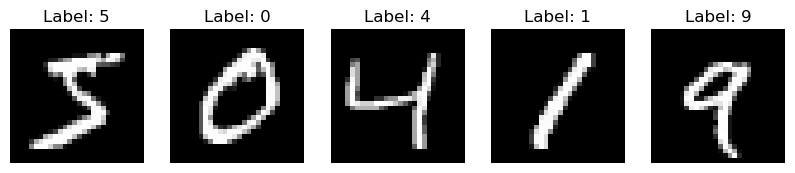

In [132]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [133]:
model = tf.keras.Sequential()

In [134]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [135]:
optimizer_1 = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer= optimizer_1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                102464    
                                                      

In [137]:
logdir = "log"
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [138]:
hist = model.fit(x_train, y_train, epochs=10,callbacks= callback)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1429 - accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0820 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0728 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0674 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0714 - accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0608 - accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0644 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0606 - accuracy: 0.9841
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0599 - accuracy: 0.9851
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

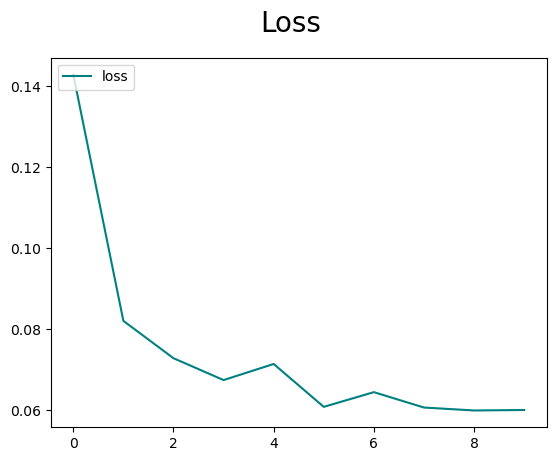

In [139]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

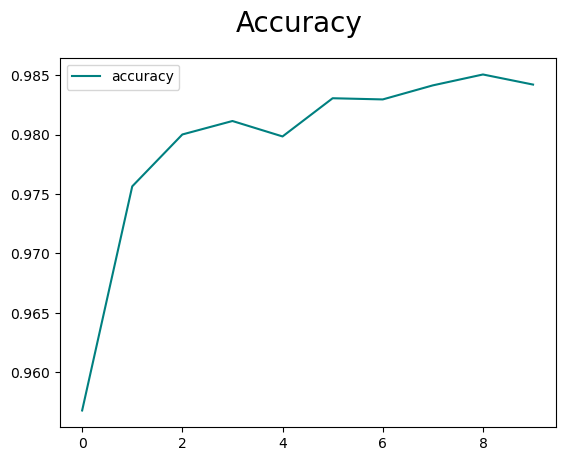

In [140]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [141]:
model.save(os.path.join('model','digits.h5'))

In [142]:
new_model = load_model(os.path.join('model','digits.h5'))

In [143]:
loss,accuracy = new_model.evaluate(x_test, y_test)
print("Loss:", loss),
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0948 - accuracy: 0.9807
Loss: 0.0947798639535904
Accuracy: 0.9807000160217285


1/1 [==============================] - 0s 82ms/step
Predicted label: tf.Tensor(8, shape=(), dtype=int64)


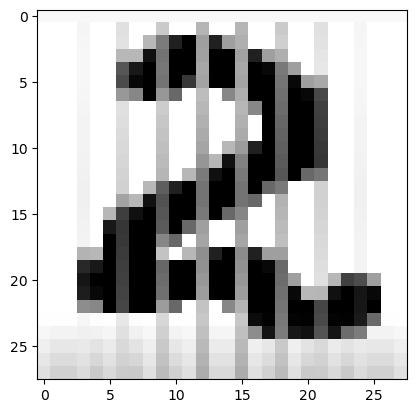

In [144]:

img = cv2.imread("two.png")
resized_img = tf.image.resize(img, (28, 28))
grayscale_img = tf.image.rgb_to_grayscale(resized_img)
normalized_img = grayscale_img / 255.0
input_img = tf.reshape(normalized_img, (-1, 28, 28))

# Perform the prediction
yhat = model.predict(input_img)

# Display the prediction result
predicted_label = tf.argmax(yhat, axis=1)[0]
print("Predicted label:", predicted_label)

# Plot the resized image
resized_img_np = resized_img.numpy().astype(int)
plt.imshow(grayscale_img[:, :, 0], cmap="gray")
plt.show()


1/1 [==============================] - 0s 18ms/step
Predicted label: tf.Tensor(3, shape=(), dtype=int64)


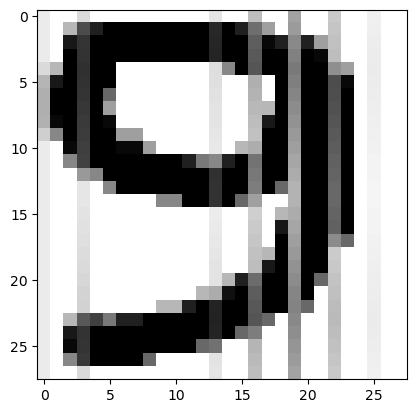

In [145]:
img = cv2.imread("nine.png")
resized_img = tf.image.resize(img, (28, 28))
grayscale_img = tf.image.rgb_to_grayscale(resized_img)
normalized_img = grayscale_img / 255.0
input_img = tf.reshape(normalized_img, (-1, 28, 28))

# Perform the prediction
yhat = model.predict(input_img)

# Display the prediction result
predicted_label = tf.argmax(yhat, axis=1)[0]
print("Predicted label:", predicted_label)

# Plot the resized image
resized_img_np = resized_img.numpy().astype(int)
plt.imshow(grayscale_img[:, :, 0], cmap="gray")
plt.show()